<a href="https://colab.research.google.com/github/rbbh/ARIMA-playground/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 


In [0]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from google.colab import files
uploaded = files.upload()

Saving redwine.txt to redwine.txt


In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict

#data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

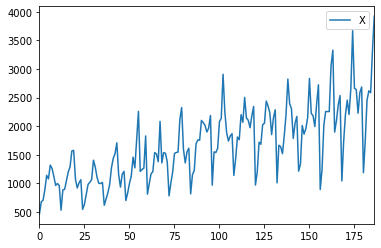

In [40]:
data.plot()

In [0]:
data_n = data.copy()
data_n = data_n/data_n.max()

In [42]:
len(data)

187

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

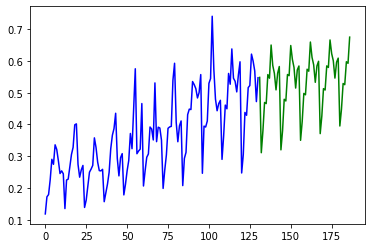

In [43]:
# Load/split the data
train, test = train_test_split(data_n, train_size=131)

# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_n.shape[0])
plt.plot(x[:131], train, c='blue')
plt.plot(x[131:], forecasts, c='green')
plt.show()

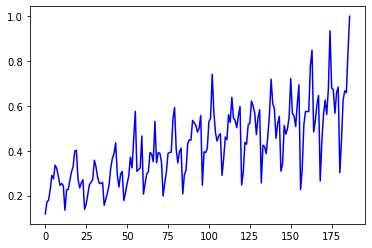

In [44]:
x = np.arange(data.shape[0])
plt.plot(x, data_n, c='blue')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [46]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.009212062937017634


In [0]:
# Extra packages for if the traditional prediction
# method doesn't work

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

In [48]:
# Define and fit the pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 12) (constant=True); AIC=-229.296, BIC=-206.356, Time=1.532 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=-93.771, BIC=-88.036, Time=0.188 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=-212.969, BIC=-201.499, Time=0.420 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=-153.681, BIC=-142.211, Time=0.430 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=-95.556, BIC=-92.689, Time=0.052 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 1, 12) (constant=True); AIC=-152.682, BIC=-132.610, Time=1.330 seconds
Fit ARIMA: (2, 1, 2)x(1, 0, 0, 12) (constant=True); AIC=-213.665, BIC=-193.592, Time=1.460 seconds
Fit ARIMA: (2, 1, 2)x(2, 0, 1, 12) (constant=True); AIC=-227.002, BIC=-201.194, Time=4.342 seconds
Fit ARIMA: (2, 1, 2)x(1, 0, 2, 12) (constant=True); AIC=-225.856, BIC=-200.049, Time=3.642 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 12) (constant=True); AIC=-102.694, BIC

Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
                           information_criterion='aic', m=12, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [0]:
# Serializing the model:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

In [50]:
# Loading it and making predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    forecasts = mod.predict(56)
    print(forecasts)

[0.55884885 0.29787286 0.37737998 0.45306271 0.47528991 0.55874158
 0.55539709 0.66509097 0.63197996 0.56504139 0.51365547 0.56044818
 0.58499044 0.32022956 0.40140063 0.47827242 0.50082667 0.58516773
 0.58185225 0.69231978 0.6590968  0.59174873 0.53993963 0.58723161
 0.61203073 0.34359622 0.42638986 0.50442025 0.52729556 0.61250249
 0.6092189  0.72043868 0.6871114  0.61937101 0.56715583 0.61493522
 0.63998682 0.36799025 0.45236496 0.53152341 0.55471378 0.64076294
 0.63751413 0.7494645  0.71604068 0.6479253  0.59532121 0.6435761
 0.66887572 0.39342893 0.4793431  0.55959907 0.58309846 0.66996612
 0.66675497 0.77941401]


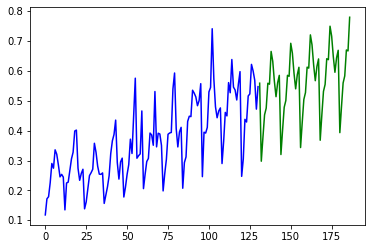

In [51]:
x = np.arange(data_n.shape[0])
plt.plot(x[:131], train, c='blue')
plt.plot(x[131:], forecasts, c='green')
plt.show()

In [52]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.005508356811527472
